## News Filtering Using NLTK

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



## **Exploring Fake News**

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Project 2.0/Fake.csv')


In [ ]:
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

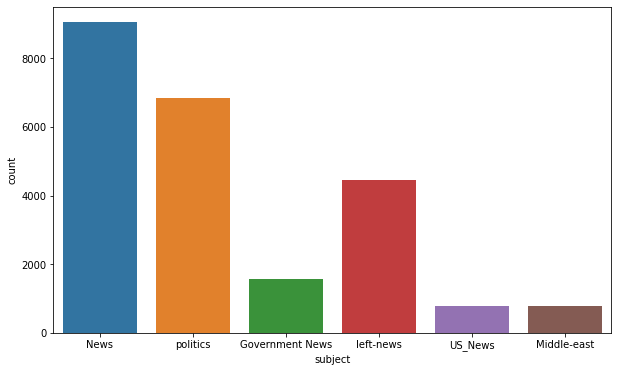

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'subject',data=fake)

### **Wordcloud**


In [ ]:
text = ' '.join(fake['text'].tolist())

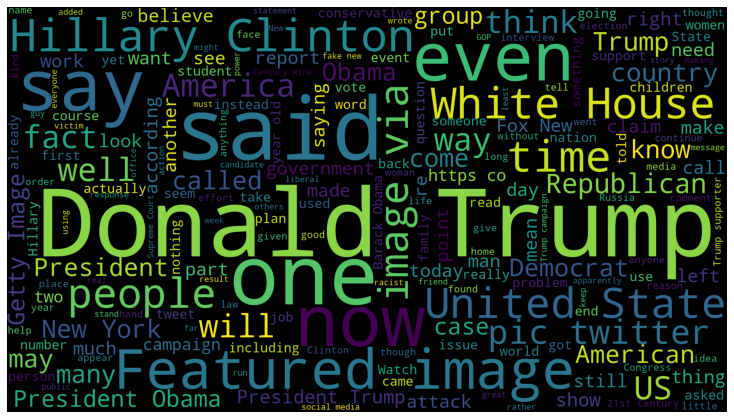

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


## **Exploring Real News**

In [ ]:
real = pd.read_csv('/content/drive/MyDrive/Project 2.0/True.csv')


In [ ]:
text = ' '.join(real['text'].tolist())

### **Wordcloud**

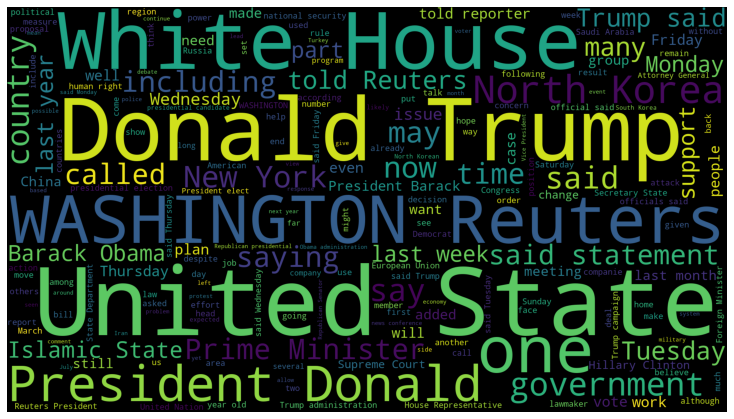

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
real.sample(5)

,title,text,subject,date
17544,Facebook will help investigators release Russi...,WASHINGTON (Reuters) - Facebook Inc (FB.O) Chi...,worldnews,"October 11, 2017"
8988,"For Donald Trump, going on about golf is par f...","TURNBERRY, Scotland (Reuters) - Donald Trump f...",politicsNews,"June 24, 2016"
14901,"Strong earthquake hits Iraq and Iran, killing ...",ANKARA/BAGHDAD (Reuters) - Thousands of homele...,worldnews,"November 12, 2017"
2277,"Tillerson says U.S., Russia can settle problem...",MANILA (Reuters) - U.S. Secretary of State Rex...,politicsNews,"August 7, 2017"
10050,Alabama governor to face impeachment push in s...,(Reuters) - Alabama Governor Robert Bentley wi...,politicsNews,"April 5, 2016"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
   record = row.split('-', maxsplit=1)
   record[1]
 
   assert(len(record[0])<120)
  except:
   unknown_publishers.append(index)


In [ ]:
len(unknown_publishers)


222

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real = real.drop(8970, axis=0)


In [ ]:
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
 
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())


In [ ]:
real['publisher']=publisher
real['text'] = tmp_text


In [ ]:
real.head()


,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist())if str(text).strip()==""]


In [ ]:
fake.iloc[empty_fake_index]


,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real['title'] +" " + real['text']
fake['text'] = fake['title'] +" " + fake['text']


In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())


# **Preprocessing**

In [ ]:
real['class'] = 1
fake ['class'] = 0


In [ ]:
real.columns


Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real[['text', 'class']]


In [ ]:
fake = fake[['text', 'class']]


In [ ]:
data = real.append(fake, ignore_index=True)


In [ ]:
data.sample(5)

,text,class
42718,breaking: muslim clock boy family…give us $15 ...,0
2135,"internet firms shift stance, move to exile whi...",1
41408,"disgusting! deeply entrenched, big money ties ...",0
31813,senator elizabeth warren tries to trash republ...,0
15431,congo opposition rejects new timetable for pol...,1


In [ ]:
!pip install spacy==2.2.3

In [ ]:
!python -m spacy download en_core_web_sm


     |████████████████████████████████| 12.0 MB 3.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!pip install beautifulsoup4==4.9.1


In [ ]:
!pip install textblob==0.15.3


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-4mzn_b3z
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-4mzn_b3z
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=5eaadce77379a93b6be793da45df8b1a673058f14ee38a15743cf3ebd40b189b
  Stored in directory: /tmp/pip-ephem-wheel-cache-b5gph6yb/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [ ]:
import preprocess_kgptalkie as ps


In [ ]:
data['text']=data ['text'].apply(lambda x: ps.remove_special_chars(x))


In [ ]:
import gensim


In [ ]:
y = data ['class'].values


In [ ]:
X = [d.split()for d in data['text'].tolist()]


In [ ]:
type(X[0])


list

In [ ]:
print(X[0])


['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)   


In [ ]:
len(w2v_model.wv.vocab)

231872

In [ ]:
w2v_model.wv['love']

array([ 3.4436328 ,  2.5765603 ,  0.8479717 ,  0.35228902,  0.12030034,
        2.5267196 ,  0.8084316 , -0.09521422,  3.2490146 ,  3.8375907 ,
        0.5823093 , -0.9913615 ,  1.2542348 ,  0.10706021, -1.8588929 ,
        1.949637  , -1.2269124 ,  2.4052725 , -3.2858117 , -1.032757  ,
       -2.0407808 , -2.372548  ,  2.9163878 , -2.9059255 ,  0.16606025,
       -0.07626558,  0.5116086 ,  1.1405972 , -0.5333696 , -2.26293   ,
       -1.9744307 ,  1.7884848 ,  1.8908788 , -5.405674  ,  0.9385958 ,
        4.6847987 , -1.010826  ,  0.49064577, -2.0032134 ,  0.97595054,
        1.9362073 ,  2.949605  ,  0.0322956 , -1.6482521 ,  0.75364375,
        0.72174066, -1.1582769 ,  0.03230919, -4.8413253 , -1.1558518 ,
       -0.748074  ,  2.1962976 ,  1.9628078 ,  3.16041   , -2.4083521 ,
        1.484134  , -3.8488598 ,  2.823837  , -0.01889797,  0.3355517 ,
       -2.1777942 ,  3.7193618 , -0.9649263 ,  2.399242  ,  2.2295582 ,
       -1.6925858 ,  1.2435943 , -3.2116559 ,  2.318328  , -0.93

In [ ]:
w2v_model.wv.most_similar('bangladesh')


[('rohingya', 0.8050374984741211),
 ('myanmar', 0.7376745939254761),
 ('bazar', 0.6829113960266113),
 ('rathedaung', 0.669093668460846),
 ('bangladeshi', 0.66511070728302),
 ('dhaka', 0.6496517658233643),
 ('refugees', 0.6443917751312256),
 ('camps', 0.6437371373176575),
 ('rohingyas', 0.6402477622032166),
 ('nauk', 0.6379685997962952)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)


In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index


{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

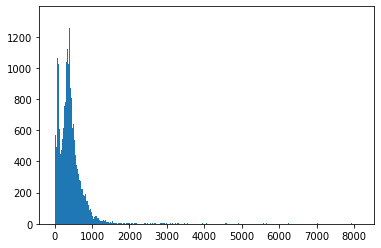

In [ ]:
plt.hist([len(x) for x in X], bins  = 700)
plt.show()


In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])


1581

In [ ]:
maxlen = 1000
X = pad_sequences(X,maxlen=maxlen)


In [ ]:
len(X[101])


1000

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))
  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  return weight_matrix


In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(231873, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights = [embedding_vectors],input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23187300  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)


Epoch 1/6
737/737 [==============================] - 777s 1s/step - loss: 0.1460 - acc: 0.9469 - val_loss: 0.0919 - val_acc: 0.9722
Epoch 2/6
737/737 [==============================] - 776s 1s/step - loss: 0.0709 - acc: 0.9765 - val_loss: 0.0597 - val_acc: 0.9822
Epoch 3/6
737/737 [==============================] - 778s 1s/step - loss: 0.0496 - acc: 0.9842 - val_loss: 0.0955 - val_acc: 0.9677
Epoch 4/6
737/737 [==============================] - 775s 1s/step - loss: 0.0462 - acc: 0.9838 - val_loss: 0.0383 - val_acc: 0.9884
Epoch 5/6
737/737 [==============================] - 771s 1s/step - loss: 0.0157 - acc: 0.9950 - val_loss: 0.0301 - val_acc: 0.9886
Epoch 6/6
737/737 [==============================] - 771s 1s/step - loss: 0.0140 - acc: 0.9954 - val_loss: 0.0384 - val_acc: 0.9890


In [ ]:
y_pred=(model.predict(X_test) >=.5).astype(int)


In [ ]:
accuracy_score(y_test, y_pred)

0.9882405345211581

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5970
           1       0.98      0.99      0.99      5255

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x = ['this is a news']

In [ ]:
X_test

array([[    0,     0,     0, ...,     1,   248,   664],
       [    0,     0,     0, ...,  3007,     1,   722],
       [    0,     0,     0, ...,  1227, 37628,   478],
       ...,
       [    0,     0,     0, ...,   197,    25,  3827],
       [    0,     0,     0, ...,   126, 20925,  2008],
       [    0,     0,     0, ...,   830,    18,    37]], dtype=int32)

In [ ]:
x = [input()]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
result = (model.predict(x) >=.5).astype(int)

In [ ]:
for item in result:
  if item ==1:
    print("Real News")
    break
  else:
    print("Fake News")
    break

Fake News
